# <font style="font-size:40px"><center><b>Quantitative Risk Management</b></center></font><font                        style="font-size:30px"><center><b>Master in Computational Finance (MCF) </b></center></font> 

<center> 

# 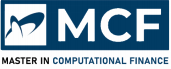

<center/>

# <font color='tomato' style="font-size:40px"><center><b>Homework 1</b></center></font></b></center></font> 

<center>
<b>profesor: </b> Dr. Vladislav Radak

<b>students: </b> 
Nikola Krivacevic, Aleksandar Milinkovic, Milos Milunovic
</center>





### <font color='MediumVioletRed' style="font-size:20px"><b>Installing and importing Libraries:</b></font>

In [1]:
# Installing additional libraries
!pip install yfinance
!pip install yahoofinancials

In [2]:
# Standard library
from typing import List

# Third-party libraries
import numpy as np 
import pandas as pd
import matplotlib. pyplot as plt 
from scipy.stats import norm
import scipy
import yfinance as yf 
from yahoofinancials import YahooFinancials
from tabulate import tabulate 

### <font color='MediumVioletRed' style="font-size:20px"><b>Assignment 1:</b></font>
Replicate the variance-covariance method with three stocks from S&P 500, take two examples from similar and different industries. Introduce weights in the portfolio. Remember, now you need to calculate the covariance between them. Change the weights arbitrarily and compare results.



Let's construct two equally-weighted portfolios:
1. Tech portfolio
  - Apple
  - Microsoft
  - Amazon
2. Industry deversified portfolio
  - Americal Airlines
  - 3M
  - Walmart

In [3]:
# Portfolio1: Apple, Microsoft, Amazon
stocks1 = ["AAPL", "MSFT", "AMZN"]

# Portfolio2: American Airlines, 3M, Walmart
stocks2 = ["AAL", "MMM", "WMT"]

# Weights for equally weighted portfolio
weights = [1/3]*3

In [4]:
def get_portfolio_data(stocks:List[str], start:str, end:str) -> pd.DataFrame:
  """Gets portfolio asset daily returns for a give period"""
  stock_data = yf.download(stocks, start, end, progress=False)
  stock_data = stock_data['Close']
  returns = stock_data.pct_change()
  return returns

In [5]:
# Time horizon
start = '2019-01-01'
end = '2021-09-01'

# Portfolio 1: asset returns
stock_returns_1 = get_portfolio_data(stocks1, start, end)

# Portfolio 2: asset returns
stock_returns_2 = get_portfolio_data(stocks2, start, end)

Getting data and calculating daily returns for each of the assets in two portfolios.

**Returns for assets in portfolio 1:**

In [6]:
stock_returns_1.tail()

,AAPL,AMZN,MSFT
Date,,,
2021-08-25,-0.008421,-0.001997,-0.002016
2021-08-26,-0.005527,0.005098,-0.009669
2021-08-27,0.007185,0.010142,0.002106
2021-08-30,0.030417,0.021477,0.012912
2021-08-31,-0.008425,0.014385,-0.005633


In [7]:
stock_returns_1.describe()

,AAPL,AMZN,MSFT
count,671.000000,671.000000,671.000000
mean,0.002256,0.001391,0.001825
std,0.022215,0.018931,0.019692
min,-0.128647,-0.079221,-0.147390
25%,-0.007644,-0.008322,-0.006609
50%,0.001749,0.001484,0.001466
75%,0.013295,0.010707,0.010925
max,0.119808,0.079295,0.142169


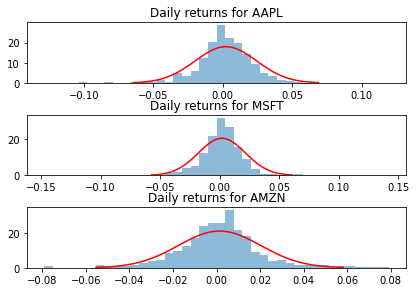

In [8]:
# Histogram of returns (overview of return distribution)

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.tight_layout() 

for i, ticker in enumerate(stocks1):
  # New subplot for each stock
  plt.subplot(3, 1, i + 1)
  plt.title(f"Daily returns for {ticker}")

  # Histogram of returns
  plt.hist(stock_returns_1[ticker], bins=40, density=True, histtype='stepfilled', alpha=0.5)

  # Standard normal for stock returns
  mean = stock_returns_1[ticker].mean()
  std_dev = stock_returns_1[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")


**Returns for assets in portfolio 2:**

In [9]:
stock_returns_2.tail()

,AAL,MMM,WMT
Date,,,
2021-08-25,0.016137,-0.002105,0.000403
2021-08-26,-0.012407,0.005043,-0.010808
2021-08-27,0.016080,-0.001382,-0.005633
2021-08-30,-0.035114,0.005742,0.008053
2021-08-31,0.022040,-0.007290,0.002708


In [10]:
stock_returns_2.describe()

,AAL,MMM,WMT
count,671.000000,671.000000,671.000000
mean,0.000251,0.000200,0.000791
std,0.045078,0.018433,0.014428
min,-0.252246,-0.129450,-0.090710
25%,-0.019918,-0.007903,-0.005331
50%,-0.001674,0.000482,0.000403
75%,0.017642,0.008674,0.006543
max,0.410970,0.125986,0.117085


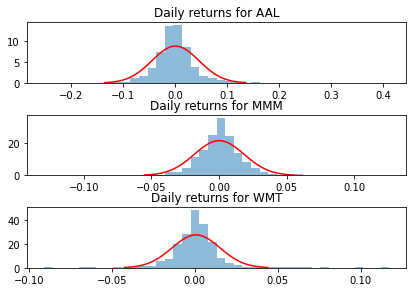

In [11]:
# Histogram of returns (overview of return distribution)
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.tight_layout() 

for i, ticker in enumerate(stocks2):
  # New subplot for each stock
  plt.subplot(3, 1, i + 1)

  # Histogram of returns
  plt.title(f"Daily returns for {ticker}")
  plt.hist(stock_returns_2[ticker], bins=40,  density=True, histtype='stepfilled', alpha=0.5)
  
  # Standard normal for stock returns
  mean = stock_returns_2[ticker].mean()
  std_dev = stock_returns_2[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")

From the previous histograms of stock returns and estimated standard normal distribution for those returns we can clearly see that returns don't follow normal distribution. That we can observe only from visual inspection of previous plots, we could further do some formal statistical normality tests and calculate skewness or kurtosis to formaly verify that.

One of the drawbacks for calculating VAR using variance-covariance method assumes that stock returns have a multivariate normal distribution. Under this assumption, the distribution of the portfolio return is also normal.

**Calculating VAR:**

We'll calculate 99%, 95% and 90% VAR for those two portfolios based on variance-covariance method. For that we need to estimate portfolio's:
- Expected return (mean)
- Volatility (standard deviation)



In [12]:
# Covariance matrix for assets in portfolio 1
cov_matrix_1 = stock_returns_1.cov()
cov_matrix_1

,AAPL,AMZN,MSFT
AAPL,0.000494,0.000278,0.000342
AMZN,0.000278,0.000358,0.000265
MSFT,0.000342,0.000265,0.000388


In [13]:
# Covariance matrix for assets in portfolio 2
cov_matrix_2 = stock_returns_2.cov()
cov_matrix_2

,AAL,MMM,WMT
AAL,2.031992e-03,0.000330,3.423765e-07
MMM,3.304892e-04,0.000340,8.794595e-05
WMT,3.423765e-07,0.000088,2.081816e-04


In [14]:
stock_returns_1.mean()

AAPL    0.002256
AMZN    0.001391
MSFT    0.001825
dtype: float64

In [15]:
# Expected daily return for portfolio 1 
portfolio_mean_1 = stock_returns_1.mean().dot(weights)
print(f"Expected daily return for portfolio 1: {np.round(portfolio_mean_1*100, 4)} %")

Expected daily return for portfolio 1: 0.1824 %


In [16]:
stock_returns_2.mean()

AAL    0.000251
MMM    0.000200
WMT    0.000791
dtype: float64

In [17]:
# Expected daily return for portfolio 2
portfolio_mean_2 = stock_returns_2.mean().dot(weights)
print(f"Expected daily return for portfolio 2: {np.round(portfolio_mean_2*100, 4)} %")

Expected daily return for portfolio 2: 0.0414 %


In [18]:
# Volatility for portfolio 1
weights = np.array(weights)
portfolio_sigma_1 = np.sqrt(weights.T.dot(cov_matrix_1).dot(weights))
print(f"Returns volatility for portfolio 1: {np.round(portfolio_sigma_1*100,4)}%")

Returns volatility for portfolio 1: 1.8283%


In [19]:
# Volatility for portfolio 2
weights = np.array(weights)
portfolio_sigma_2 = np.sqrt(weights.T.dot(cov_matrix_2).dot(weights))
print(f"Returns volatility for portfolio 2: {np.round(portfolio_sigma_2*100,4)}%")

Returns volatility for portfolio 2: 1.9486%


In [20]:
# VAR for portfolio 1
VaR_90 = norm.ppf(1-0.9, portfolio_mean_1, portfolio_sigma_1)
VaR_95 = norm.ppf(1-0.95, portfolio_mean_1, portfolio_sigma_1)
VaR_99 = norm.ppf(1-0.99, portfolio_mean_1, portfolio_sigma_1)
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0216063
95%                      -0.0282485
99%                      -0.0407083


For calculated VAR for portfolio 1, we can expect that the following day, losses won't be greater than:
- 2.16% with a confidence of 90% (10 % change of loss being greater than 2.16%)
- 2.28% witha a confidence of 95% (5 % change of loss being greater than 2.28%)
- 4.07% witha a confidence of 99% (1 % change of loss being greater than 4.07%)


In [21]:
# VAR for portfolio 2
VaR_90 = norm.ppf(1-0.9, portfolio_mean_2, portfolio_sigma_2)
VaR_95 = norm.ppf(1-0.95, portfolio_mean_2, portfolio_sigma_2)
VaR_99 = norm.ppf(1-0.99, portfolio_mean_2, portfolio_sigma_2)
print (tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0245587
95%                      -0.0316381
99%                      -0.044918


For calculated VAR for portfolio 2, we can expect that the following day, losses won't be greater than:
- 2.24% with a confidence of 90% (10 % change of loss being greater than 2.24%)
- 3.16% witha a confidence of 95% (5 % change of loss being greater than 3.16%)
- 4.49% witha a confidence of 99% (1 % change of loss being greater than 4.49%)


For all the confidence levels, based on calulated VAR, we can see that portfolio 2 (stocks from different industries) is riskier than the portfolio 1 (tech stocks).

Now let's test different portfolio allocations and see which one has the best VAR measure (we could further do portfolio optimisation based on VAR level)

In [22]:
def var_varriance_covariance(returns, weights):
  """Calculates VAR using variance-covariance method."""

  # Calculated portfolio mean and signa (assuming normal return distribution)
  cov_matrix = returns.cov()
  mean = returns.mean().dot(weights)
  sigma = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
  
  VaR_90 = norm.ppf(1-0.9, mean, sigma)
  VaR_95 = norm.ppf(1-0.95, mean, sigma)
  VaR_99 = norm.ppf(1-0.99, mean, sigma)
  print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Portfolio 1:

In [23]:
var_varriance_covariance(stock_returns_2, np.array([0.25, 0.25, 0.5]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.020301
95%                      -0.0262002
99%                      -0.0372661


In [24]:
var_varriance_covariance(stock_returns_2, np.array([0.1, 0.5, 0.4]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0179888
95%                      -0.0232136
99%                      -0.0330144


In [25]:
var_varriance_covariance(stock_returns_2, np.array([0.05, 0.4, 0.55]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0163941
95%                      -0.0211913
99%                      -0.0301899


We can see that for a few portfolio allocations we have that the best risk measure has the third one: 5% into the first asset, 40% into the second one and 55% into the third one.

Portfolio 2:

In [26]:
var_varriance_covariance(stock_returns_1, np.array([0.25, 0.25, 0.5]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0216868
95%                      -0.0283519
99%                      -0.0408546


In [27]:
var_varriance_covariance(stock_returns_1, np.array([0.1, 0.5, 0.4]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.021186
95%                      -0.0276601
99%                      -0.0398044


In [28]:
var_varriance_covariance(stock_returns_1, np.array([0.05, 0.4, 0.55]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0213318
95%                      -0.0278534
99%                      -0.0400869


In all the additional allocation we test out, it seems that the portfolio 2 is riskier than the portfolio 1.

### <font color='MediumVioletRed' style="font-size:20px"><b>Assignment 2:</b>

a) Construct a portfolio A with three value stocks with predefined weigts and portfolio B with hyped stocks (or even crypo). Explain your choice of assets shortly.

b) Calculate 95% VaR for A and B using MCM and python and compare them over different number of simulations. 

First, let's start with construction our two portfolios.

Some of the characteristics of the value stocks are that they are:
- usually mature businesses.
- have a steady (but not spectacular) growth rates.
- have a relatively stable revenues and earnings.
- usually paying dividends.

The general idea for value investing is to find companies trading at a discount to their intrinsic value, with the expectation that they'll be likely to outperform the overall stock market over time.

For the **portfolio A** we'll chose the following three stocks:
- Berkshire Hathaway
- Procter & Gamble
- Johnson & Johnson

For the **portfolio B**, consistent of the hyped assets, we'll chose some cryptocurrencies. During period of one year, major cryptocurrencies by market cap, have had returns of more than 500%, while some retail driven hyped altcoins, like Dodgecoin, had a increadible return of more than 100x!
In the crypto portfolio we'll put cryptos that had recent traction and upward trent and they are in the top 20 cyptocurrencies by market cap:
- Solana
- Polkadot
- Avalanche


In [29]:
# Portfolio A (value stocks)
stocks_a = ["BRK-B", "PG", "JNJ"]

# Portfolio B (cryptocurrencies)
stocks_b = ["SOL1-USD", "DOT1-USD", "AVAX-USD"]

# Weights for equally weighted portfolio
weights = [1/3]*3

Getting potfolio asset data:

In [30]:
# Time horizon
start = '2019-01-01'
end = '2021-09-01'

# Portfolio 1: asset returns
asset_returns_a = get_portfolio_data(stocks_a, start, end)

# Portfolio 2: asset returns
asset_returns_b = get_portfolio_data(stocks_b, start, end)

Daily returns of portfolio assets:

1. Portfolio A: daily returns for portfolio assets

In [31]:
asset_returns_a.tail()

,BRK-B,JNJ,PG
Date,,,
2021-08-25,0.004475,-0.006614,-0.003562
2021-08-26,-0.007066,-0.005338,-0.001752
2021-08-27,0.004662,-0.002135,-0.000772
2021-08-30,-0.003280,0.004221,0.004357
2021-08-31,0.000385,-0.003052,-0.003778


In [32]:
asset_returns_a.describe()

,BRK-B,JNJ,PG
count,671.000000,671.000000,671.000000
mean,0.000632,0.000552,0.000772
std,0.015520,0.014087,0.014841
min,-0.095921,-0.072984,-0.087373
25%,-0.005596,-0.005572,-0.005426
50%,0.000882,0.000658,0.000947
75%,0.007255,0.006522,0.007214
max,0.116099,0.079977,0.120090


2. Portfolio B: daily returns for portfolio assets

In [33]:
asset_returns_b.tail()

,AVAX-USD,DOT1-USD,SOL1-USD
Date,,,
2021-08-28,0.002383,-0.022695,0.097815
2021-08-29,-0.053549,-0.009005,-0.023096
2021-08-30,-0.130165,0.012117,0.170162
2021-08-31,-0.044470,0.208307,-0.018644
2021-09-01,0.061900,0.053049,0.023499


In [34]:
asset_returns_b.describe()

,AVAX-USD,DOT1-USD,SOL1-USD
count,388.000000,354.000000,481.000000
mean,0.009446,0.010290,0.013943
std,0.091885,0.084538,0.090113
min,-0.364950,-0.379335,-0.372088
25%,-0.032923,-0.033762,-0.039575
50%,0.000000,0.003126,0.006619
75%,0.038237,0.043349,0.061325
max,0.750013,0.559877,0.361881


Now let's calcualte 95% VAR using Monte Carlo method over different simulation and see which of two constructed porfolios is risker based on the VAR metric.

In [35]:
# Time steps (number of days ahead for simulation)
T = 100

# Initial porfolio value
initial_portfolio = 1000

# Number of simulations
simulations = [50, 500, 1000]

In [36]:
def var_mcm(returns: pd.Series, alpha:int = 5) -> str:
  """Calculates VAR using Monte Carlo simulations"""

  if isinstance(returns, pd.Series):
      return np.percentile(returns, alpha)
  else:
      raise TypeError("Expected a pandas data series.")

In [37]:
def simulate_portfolio(returns: pd.DataFrame, weights: List[float], num_of_sim:int = 400, T:int = 100, initial_portfolio:int = 1000000):

  # Portfolio assets' expected returns and cov. matrix
  returns_mean = returns.mean()
  cov_matrix = returns.cov()

  # Placeholder matrix for asset returs
  mean = np.full(shape=(T, len(weights)), fill_value=returns_mean)
  mean = mean.T

  # Placeholder for portfolio mtm value simulation
  # T days ahead over num_of_sim simulations
  portfolio_sims = np.full(shape=(T, num_of_sim), fill_value=0.0)

  # Simulate portfolio movement
  for m in range(0, num_of_sim):
      Z = np.random.normal(size=(T, len(weights)))
      L = np.linalg.cholesky(cov_matrix)
      daily_returns = mean + np.inner(L, Z)
      portfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T)+1)*initial_portfolio
  
  return portfolio_sims

1. Portfolio A: 95% VAR using MCM

In [38]:
# Simulating portfolio evolution 
portfolio_a_simulations = []
for num_of_sim in simulations:
  portfolio_a_simulations.append(simulate_portfolio(
                                      returns=asset_returns_a,
                                      weights=weights,
                                      num_of_sim=num_of_sim,
                                      T=T,
                                      initial_portfolio=initial_portfolio
                                  ))


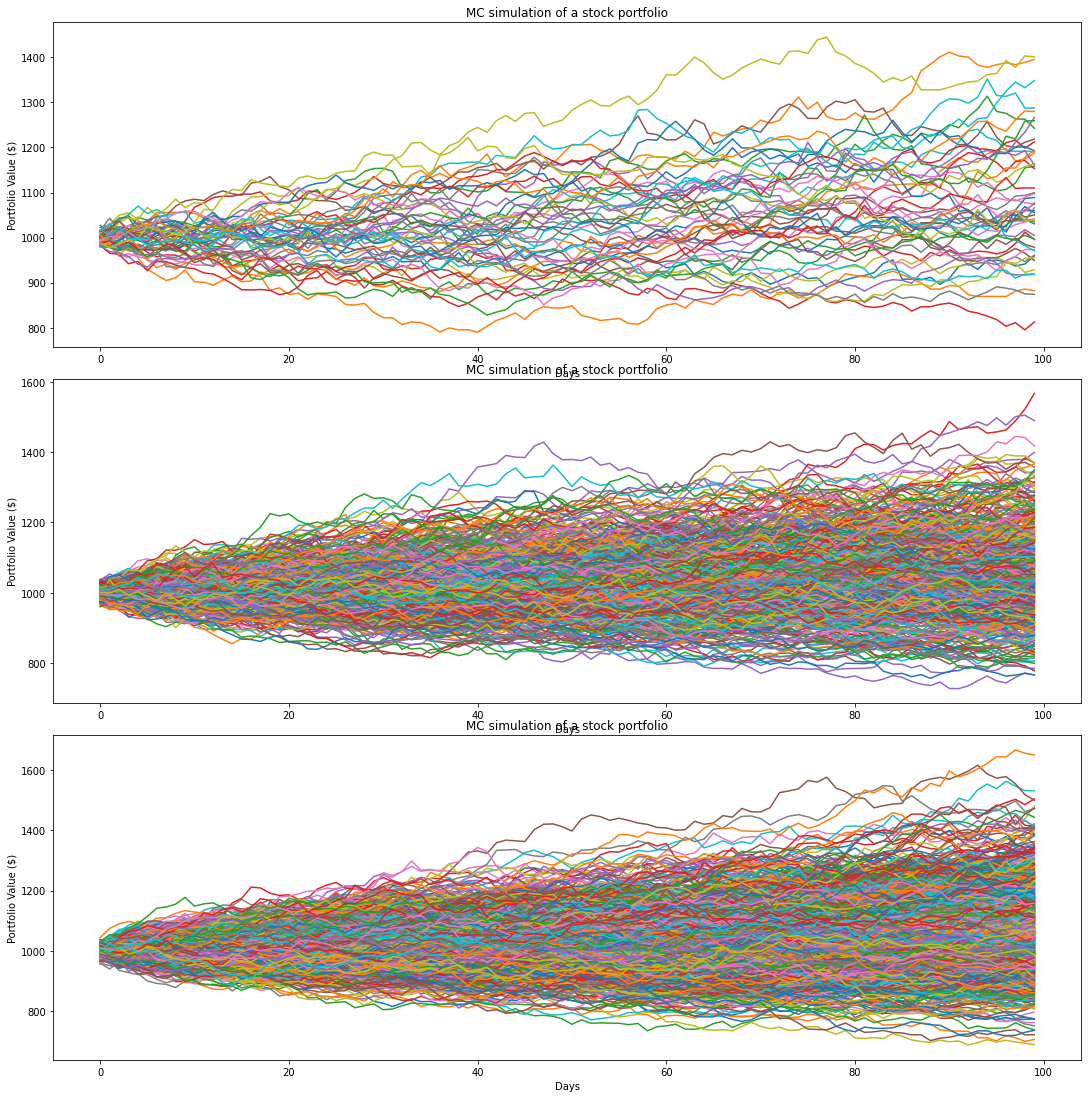

In [39]:
# Ploting portfolio simulation
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.tight_layout() 

for i, sim in enumerate(portfolio_a_simulations):
  # New subplot for each portfolio simulation
  plt.subplot(3, 1, i + 1,)

  plt.plot(sim)
  plt.ylabel('Portfolio Value ($)')
  plt.xlabel('Days')
  plt.title('MC simulation of a stock portfolio')
  

In [40]:
# Calculating portfolio VAR

for i, sim in enumerate(portfolio_a_simulations):
  portfolio_last_values = pd.Series(sim[-1,:])

  VaR = (initial_portfolio - var_mcm(portfolio_last_values, alpha=5))

  print(f'95% VaR with {simulations[i]} simulations: ${round(VaR,2)}')

95% VaR with 50 simulations: $101.5
95% VaR with 500 simulations: $134.06
95% VaR with 1000 simulations: $133.14


From the calculated 95% VAR using MCM we can conclude that for the portfolio A (given the initial portfolio value of 1000$) with a confidence of 5% we expect to lose more than \$140.84 based on 1000 simulations in the next 100 days.

2. Portfolio B: 95% VAR using MCM

In [41]:
# Simulating portfolio evolution 
portfolio_b_simulations = []
for num_of_sim in simulations:
  portfolio_b_simulations.append(simulate_portfolio(
                                      returns=asset_returns_b,
                                      weights=weights,
                                      num_of_sim=num_of_sim,
                                      T=T,
                                      initial_portfolio=initial_portfolio
                                  ))


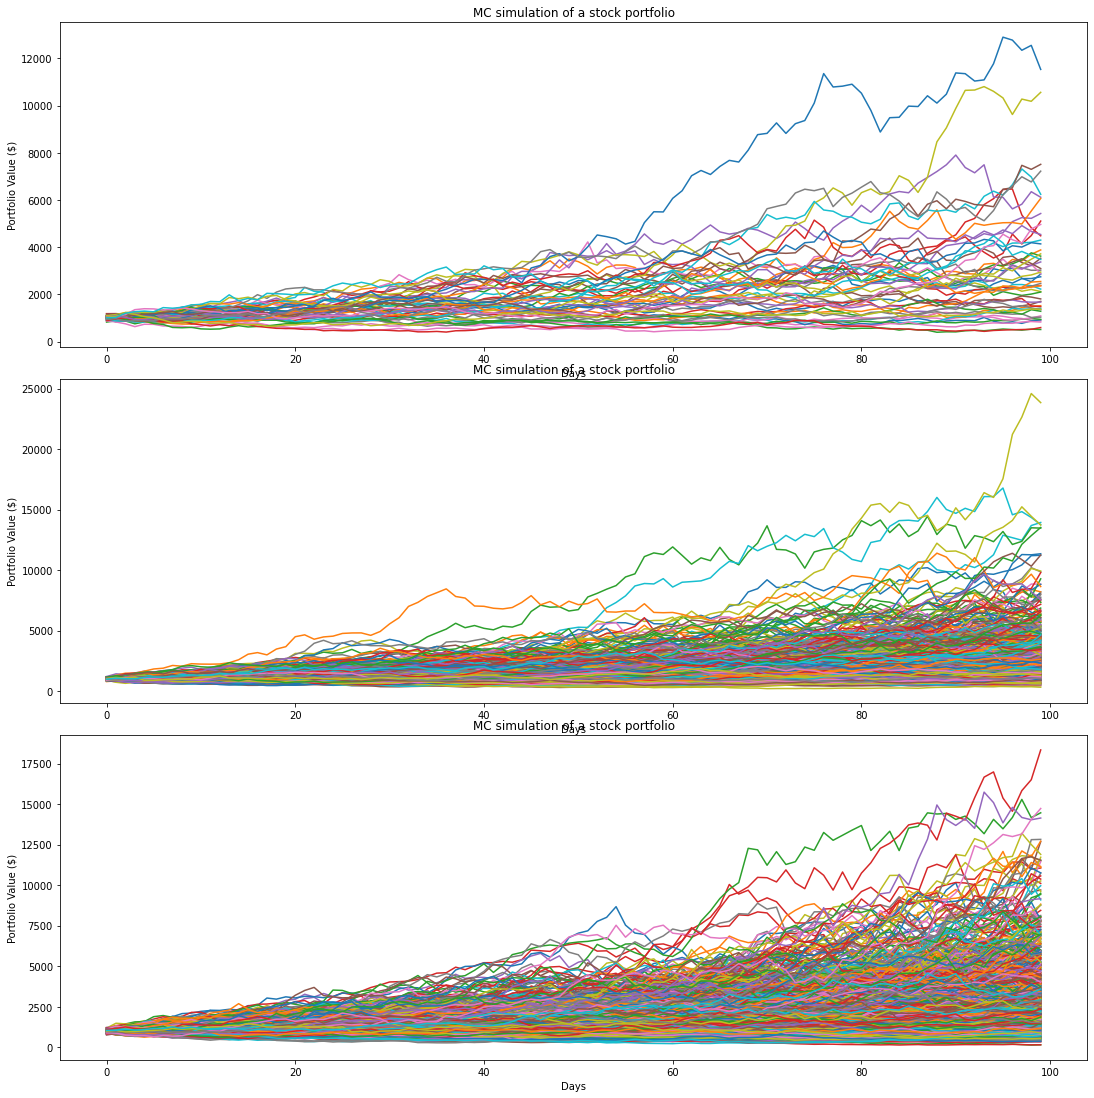

In [42]:
# Ploting portfolio simulation
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.tight_layout() 

for i, sim in enumerate(portfolio_b_simulations):
  # New subplot for each portfolio simulation
  plt.subplot(3, 1, i + 1,)

  plt.plot(sim)
  plt.ylabel('Portfolio Value ($)')
  plt.xlabel('Days')
  plt.title('MC simulation of a stock portfolio')
  

In [43]:
# Calculating portfolio VAR

for i, sim in enumerate(portfolio_b_simulations):
  portfolio_last_values = pd.Series(sim[-1,:])

  VaR = (initial_portfolio - var_mcm(portfolio_last_values, alpha=5))

  print(f'95% VaR with {simulations[i]} simulations: ${round(VaR,2)}')

95% VaR with 50 simulations: $146.59
95% VaR with 500 simulations: $177.39
95% VaR with 1000 simulations: $222.85


From the calculated 95% VAR using MCM we can conclude that for the portfolio B (given the initial portfolio value of 1000$) with a confidence of 5% we expect to lose more than \$249.86 based on 1000 simulations in the next 100 days.

Based on different number of Monte Carlo simulations for calculating 95% VAR for both portfolios, we can conclude that crypto portfolio is much more riskier, we could potentially lose at least twice more money. 

### <font color='MediumVioletRed' style="font-size:20px"><b>Assignment 3:</b></font>
Make a short python example that shows that Value at Risk is not a coherent risk measure. Take a definition for a coherent risk measure from *Artzner et al. (1999)*.

References:

- "*COHERENT MEASURES OF RISK*" from *Artzner et al.* (1999) presents a set of four desirable properties for measures of risk, and call
the measures satisfying these properties **“coherent”**

 Paper can be accesse [here](https://people.math.ethz.ch/~delbaen/ftp/preprints/CoherentMF.pdf).

- [Wiki page](https://en.wikipedia.org/wiki/Coherent_risk_measure) for coherent risk measure.

For risk measure to be **coherent** risk measure, by definition, it has to fulfill following desirable properties:

  1. *Monotonicity* (greater the expected return, lesser the risk)
  2. *Sub-additivity* (total portfolio risk cannot be greater than the sum of the risk of all portfolio assets - deversification can lower the risk)
  3. *Positive Homogenity* (risk is proportional to the size of the portfolio)
  4. *Translation Invariance* (adding sure capital/cash to portfolio reduces risk)

From theoretical properties of VAR, we know that it isn't a coherent risk measure, so the alternative risk measure that satisfies all required properties is expected shortfal (aka. CVAR - conditional VAR or AVAR - average VAR).

VAR fails to satisy sub-additivity property. So let's examine that property into more detail.

**Sub-additivity**

Consider a random outcome ${\displaystyle X}$  viewed as an element of a linear space ${\displaystyle {\mathcal {L}}} $ of measurable functions, defined on an appropriate probability space. A functional ${\displaystyle \varrho}: \mathcal{L} → {\displaystyle \mathbb {R} \cup \{+\infty \}}$ is said to be coherent risk measure for ${\displaystyle {\mathcal {L}}}$ if it satisfies the 4 previosuly mentioned properties. One of them is Sub-additivity.

*Definition*

If $Z_1$ and $Z_2$ are portfolios than the sub-additivity property states:

$\mathrm\; Z_1,Z_2 \in \mathcal{L} ,\; \mathrm{then}\; \varrho(Z_1 + Z_2) \leq \varrho(Z_1) + \varrho(Z_2)$

In financial risk management, sub-additivity implies that diversification could be beneficial - *risk of the portfolio should be less than or equal than the risk sum of its components*. 


*Disclamer*

VAR is coherent risk measure, it manifests sub-additity property under the assumption of elliptically distributed losses (e.g. normally distributed) when the portfolio value is a linear function of the asset prices. Value at risk becomes equivalent to a mean-variance approach where the risk of a portfolio is measured by the variance of the portfolio's return. 

Now let's look at simple example and show that VAR is not a coherent risk measure (doesn't satisfy sub-additivity property):

In [44]:
def var_historical(returns, confidence_level=.05):
  """Calculated historical VAR (non-parametric method)"""
  return returns.quantile(confidence_level, interpolation='higher')

Let's assume that we have two assets and their quarterly returs. We want to check sub-additivity property for the 95% VAR.

In [45]:
# Quarterly returns for two assets
s1 = np.array([-0.1, 0, 0.05, 0.17])
s2 = np.array([0, -0.1, 0.03, 0.13])

In [46]:
var_s1 = var_historical(pd.Series(s1))
print(f"95% VAR for asset 1: {var_s1}%")

95% VAR for asset 1: 0.0%


In [47]:
var_s2 = var_historical(pd.Series(s2))
print(f"95% VAR for asset 1: {var_s2}%")

95% VAR for asset 1: 0.0%


In [48]:
var_p = var_historical(pd.Series(0.5*s1 + 0.5*s2))
print(f"95% VAR for portfolio of two assets: {var_p}%")

95% VAR for portfolio of two assets: -0.05%


On this example we can see that VAR is not coherent risk measure because it doesn't satisfy sub-additivity property.

Based on this little illustration, from VAR perspective, it seems that deversification brings us additional risk, which we know it's not true.

**Additional research**

Jon Danıelsson from London School of Economics explains that in practical settings subadditiviy for VAR is usually not violeted (it is very unlikely that we'll  be in that situation):
- [short video interview](https://www.youtube.com/watch?v=41T4xoqeeLE)
- [Subadditivity Re–Examined: the Case for
Value–at–Risk paper](https://people.orie.cornell.edu/gennady/techreports/VaRsubadd.pdf)

Quote: "*This paper explores the potential for violations of VaR subadditivity both theoretically and by simulations, and finds that for most
practical applications VaR is subadditive. Hence, there is no reason to
choose a more complicated risk measure than VaR, solely for reasons
of subadditivity*"

Now let's look at one empirical example where we can observe sub-additivity property of VAR.

Most of the assets returns don't deviate as much from the standard normal. Exception to that would be distributions with fat tails.

In [49]:
# Two stocks: Booking Holdings, Norwegian Cruise Line
stocks = ["BKNG", "NCLH"]

# Time horizon
start = '2019-01-01'
end = '2021-09-01'

# Stock returns
returns = get_portfolio_data(stocks, start, end)
returns.tail()

,BKNG,NCLH
Date,,
2021-08-25,0.013739,0.010085
2021-08-26,0.005747,-0.027266
2021-08-27,0.012592,0.032767
2021-08-30,-0.012041,-0.030199
2021-08-31,0.009641,0.018526


In [50]:
# Calculating equally-weighted portfolio returns
returns["Portfolio"] = 0.5 * returns["BKNG"] + 0.5 * returns["NCLH"]
returns.tail()

,BKNG,NCLH,Portfolio
Date,,,
2021-08-25,0.013739,0.010085,0.011912
2021-08-26,0.005747,-0.027266,-0.010759
2021-08-27,0.012592,0.032767,0.022680
2021-08-30,-0.012041,-0.030199,-0.021120
2021-08-31,0.009641,0.018526,0.014084


In [51]:
var_historical(returns["BKNG"].dropna(axis=0), 0.01)

-0.07472738935214884

In [52]:
var_historical(returns["NCLH"].dropna(axis=0), 0.01)

-0.15621623477420288

In [53]:
var_historical(returns["Portfolio"].dropna(axis=0), 0.01)

-0.09271067381224457

In this practical setting we can see that historical 99% VAR of the portfolio is less than the sum of VARs for each individual assets. Thus, VAR is on this example exibiting sub-additivity property.